<hr style="height: 1px;">
<i>This code was authored by Alex Shvonski, Copyright 2020 MIT All Rights Reserved.</i>
<hr style="height: 1px;">

<h2>Initializing the program</h2>

<font size="3">To initialize the visualization, you may need to click "Run all initialization cells" above (see button location in figure).</font>

<img src="img/binder_initialize_button.png" alt="Drawing" style="width: 700px;" align="left"/>

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<font size="3">You should see the visualization <i>directly below this line</i>, before the next section.</font>

<br/>
<br/>
<hr style="height: 1px;">

In [19]:
#This code was authored by Alex Shvonski, Copyright 2020 MIT All Rights Reserved.

%matplotlib notebook
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets import interact, interactive, interactive_output, fixed, IntSlider, HBox, Layout, Output, VBox
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from math import pi

In [20]:
#Define functions
###############################################
###############################################
def func1(x,t,L,polarity):
    arg1 = (x - (t/10.)*np.ones(len(x)))
    f1 = np.zeros(len(x))
    for i in range(len(arg1)):
        if arg1[i] < 0:
            f1[i] = 0.
        elif 0 <= arg1[i] <= 2:
            f1[i] = 1.
        elif 0 < arg1[i]:
            f1[i] = 0.

    x = L - x
    arg2 = (x - (t/10.)*np.ones(len(x)))
    f2 = np.zeros(len(x))
    for i in range(len(arg2)):
        if arg2[i] < 0:
            f2[i] = 0.
        elif 0 <= arg2[i] <= 2:
            f2[i] = 1.
        elif 0 < arg2[i]:
            f2[i] = 0.
            
    if polarity=="pos":
        result = f1+f2
        
    elif polarity=="neg":
        result = f1-f2
        
    return result


def func2(x,t,L,polarity):
    arg1 = (x - (t/10.)*np.ones(len(x)))
    f1 = np.zeros(len(x))
    for i in range(len(arg1)):
        if arg1[i] < 0:
            f1[i] = 0.
        elif 0 <= arg1[i] <= 1.:
            f1[i] = arg1[i]
        elif 1. <= arg1[i] <= 2.:
            f1[i] = 2.-arg1[i]
        elif 0 < arg1[i]:
            f1[i] = 0.

    x = L - x
    arg2 = (x - (t/10.)*np.ones(len(x)))
    f2 = np.zeros(len(x))
    for i in range(len(arg2)):
        if arg2[i] < 0:
            f2[i] = 0.
        elif 0 <= arg2[i] <= 1.:
            f2[i] = arg2[i]
        elif 1. <= arg2[i] <= 2.:
            f2[i] = 2.-arg2[i]
        elif 0 < arg2[i]:
            f2[i] = 0.

    if polarity=="pos":
        result = f1+f2
        
    elif polarity=="neg":
        result = f1-f2
        
    return result


def func3(x,t,L,polarity):
    arg1 = (x - (t/10.)*np.ones(len(x)))
    f1 = np.zeros(len(x))
    for i in range(len(arg1)):
        if arg1[i] < 0:
            f1[i] = 0.
        elif 0 <= arg1[i] <= 2.:
            f1[i] = np.sqrt(1-(arg1[i]-1.)**2.)
        elif 0 < arg1[i]:
            f1[i] = 0.

    x = L - x
    arg2 = (x - (t/10.)*np.ones(len(x)))
    f2 = np.zeros(len(x))
    for i in range(len(arg2)):
        if arg2[i] < 0:
            f2[i] = 0.
        elif 0 <= arg2[i] <= 2.:
            f2[i] = np.sqrt(1-(arg2[i]-1.)**2.)
        elif 0 < arg2[i]:
            f2[i] = 0.
        
    if polarity=="pos":
        result = f1+f2
        
    elif polarity=="neg":
        result = f1-f2
        
    return result

<IPython.core.display.Javascript object>


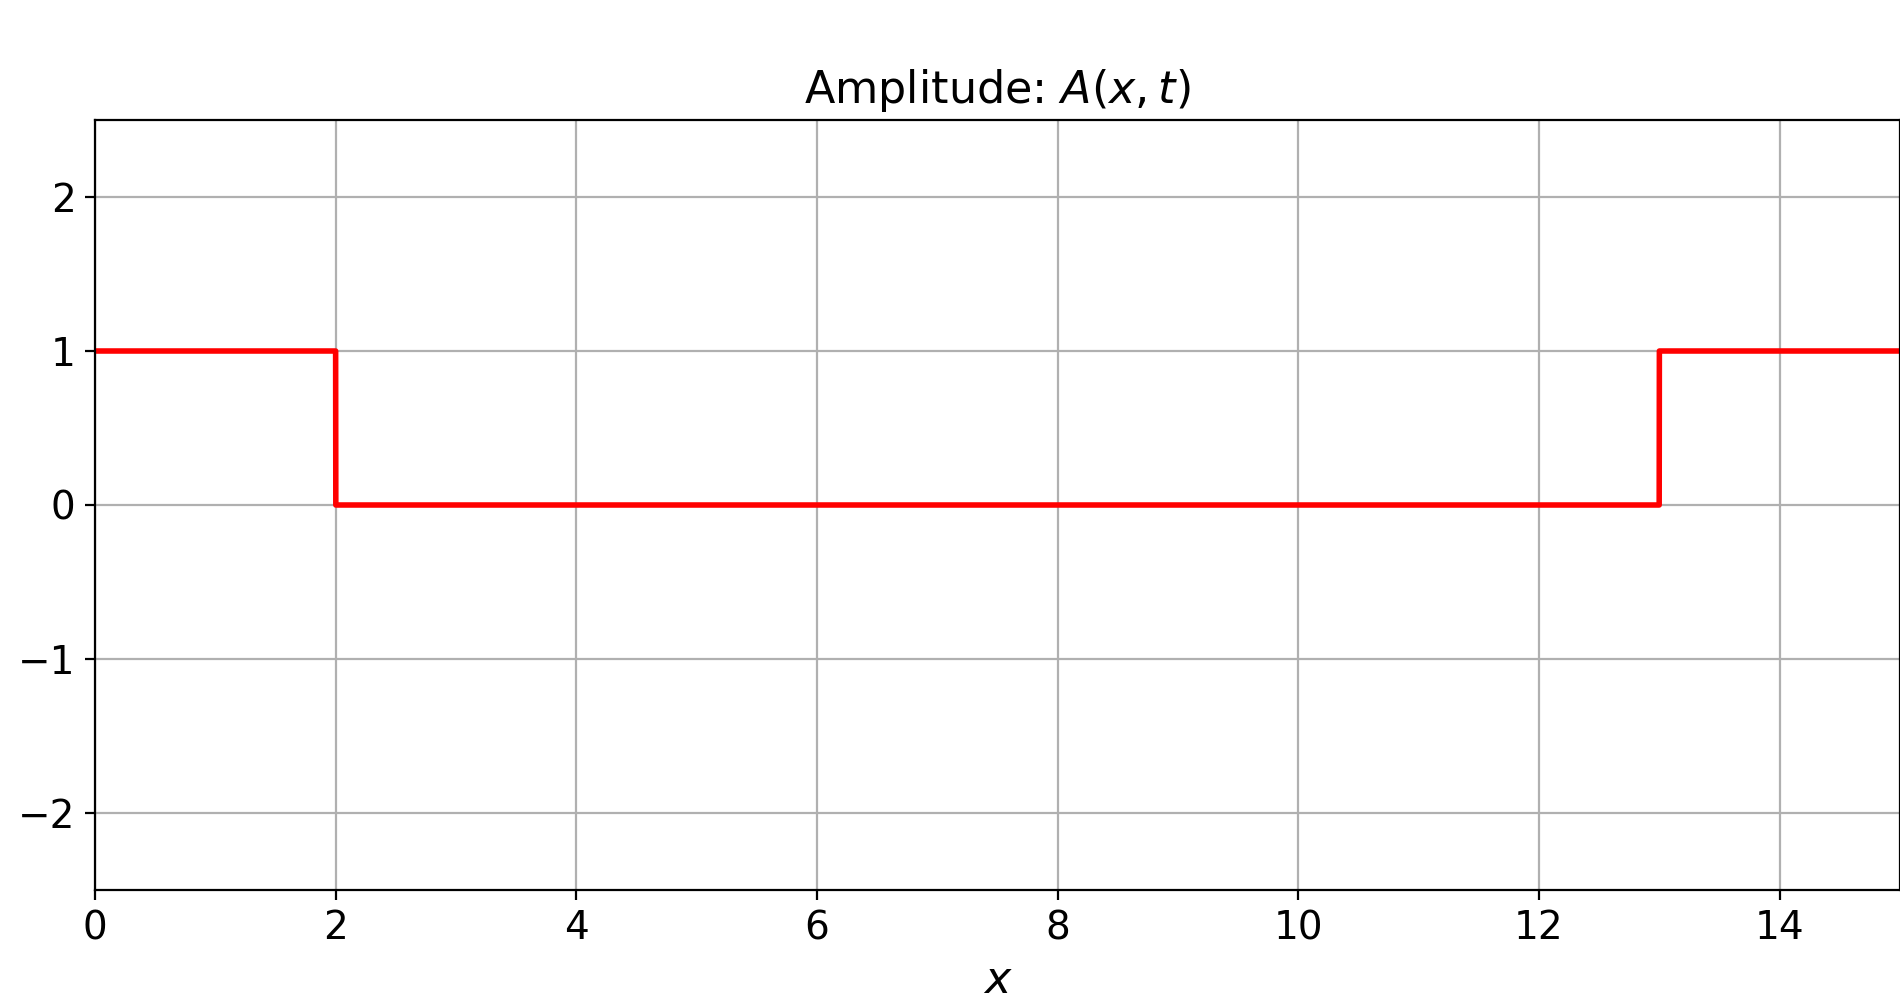

In [21]:
#Define plot
###############################################
###############################################
fig, ax = plt.subplots(1, 1, figsize=(9.5, 5))
plt.subplots_adjust(left=0.05, bottom=None, right=1, top=None, wspace=None, hspace=1.)
L=15
x = np.linspace(0., L, 10000)
polarity = "pos"
func=func1
t=0.

#############################
#plot1
y_max = max(func(x,t,L,polarity))*2.5

line_1, = ax.plot(x, func(x,t,L,polarity),
                     'r-', lw=2)



#plot params
ax.set_title('Amplitude: $A(x,t)$', fontsize=16)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylim(-y_max,y_max)
ax.set_xlim(min(x),max(x))
ax.grid(True)
plt.setp(ax.get_xticklabels(), fontsize=14)
plt.setp(ax.get_yticklabels(), fontsize=14)


#Define plot updater
###############################################
###############################################
def update(func,t,polarity):
    #plot1
    #############################
    line_1.set_ydata(func(x,t,L,polarity))
    
    fig.canvas.draw_idle()
    return


#Define control elements
###############################################
###############################################
s1=widgets.Dropdown(
    options=[('function-1', func1),('function-2', func2),('function-3', func3)],
    value=func1,
    description='Function:')


s1_1=widgets.Dropdown(
    options=[('positive', "pos"),('negative', "neg")],
    value="pos",
    description='Polarity:')


s2=widgets.IntSlider(
    min=0,
    max=L*10,
    step=1.,
    value=0.,
    layout=Layout(width='600px'),
    description='$t$',
    style = {'description_width': 'initial'})


#Connect controls to plot
###############################################
###############################################
out = interactive_output(update, {'func': s1, 'polarity': s1_1, 't': s2})


#Set layout
###############################################
###############################################
box_layout = Layout(display='flex', flex_flow='row', justify_content='space-between', align_items='center')


#Display output
###############################################
###############################################
d = display(HBox([s1, s1_1, s2], layout=box_layout))

<hr style="height: 1px;">

<h2>About the Visualization</h2>

<font size="3"><b>Plot:</b> This plot shows the superposition of flipped, identical waves traveling towards each other.</font>

<br/>
<font size="3"><b>Drop-down and Sliders:</b>
<ul>
    <li>Function: select a function from the drop-down menu.</li>
    <li>Polarity: choose the polarity of the counter-propagating function (positive or negative)</li>
    <li>$t$: vary the time to display the functions advancing towards each other</li>
</ul>
</font>

<br/>

<hr style="height: 1px;">

<h2>Exploration</h2>

<font size="3">Consider the following questions and possible actions:
<ul>
    <li>What do you expect the superposition of different waveforms to look like?</li>
</ul>      
</font>

<br/>

<hr style="height: 1px;">

<h2>Viewing the Code</h2>
<br/>
<font size="3">You are encouraged to click the button below to view the source code. You can alter the code and rerun it within this notebook, or download the notebook itself and run the code locally on your own machine.</font>

In [22]:
#Enable hidden code
###############################################
###############################################
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
